In [124]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.metrics import roc_curve
from hdpy.metrics import compute_roc_enrichment
import seaborn as sns
sns.set_style("whitegrid")

import os


plt.rc('text', usetex=False)
plt.rc('font', family='serif')
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
plt.rc('axes', labelsize=17)
plt.rc('figure', titlesize=20)

from tqdm import tqdm_notebook as tqdm
from pathlib import Path

RANDOM_SEED=5
# RANDOM_SEED=99
# RANDOM_SEED=101
# RANDOM_SEED=109
output_result_dir = Path(f"/p/vast1/jones289/hd_results/{RANDOM_SEED}")

green_color_pal = sns.color_palette("Greens", 10)
blue_color_pal = sns.color_palette("Blues", 10)
red_color_pal = sns.color_palette("Reds", 10)
purple_color_pal = sns.color_palette("Purples", 10)
rocket_color_pal = sns.color_palette("rocket", 10)



d_to_idx_map = {"1k": 1000,
                "10k": 10000,
                "100k": 100000,
                "1m": 1000000,
                "20k": 20000,
                "50k": 50000,
                "200k": 200000,
                "500k": 500000,
                "16384": 16384}

# define the values of D instead so I don't have to enumerate this extensively...
# d_list = [1000, 10000, 100000, 1000000, 16384, 20000, 50000, 200000, 500000]
# model_name_map = {
'''

'''





all_model_map ={
    "molehd-bpe": ("MoleHD (bpe)", 10000),
    "logreg-1024-1": ("Log. Reg. (L2), r=1", 1024),
    "logreg-1024-2": ("Log. Reg. (L2), r=2", 1024),
    "logreg-1024-4": ("Log. Reg. (L2), r=4", 1024),
    "logreg-2048-1": ("Log. Reg. (L2), r=1", 2048),
    "logreg-2048-2": ("Log. Reg. (L2), r=2", 2048),
    "logreg-2048-4": ("Log. Reg. (L2), r=4", 2048),
    "mlp-1024-1": ("MLP-1024", 1024),
    # "mlp-2048-1": ("MLP-2048", 2048),
    "hdbind-rp-molformer-1k": ("HDB-MoLFormer", 1000),
    "hdbind-rp-molformer": ("HDB-MoLFormer", 10000),
    "hdbind-rp-molformer-100k": ("HDB-MoLFormer", 100000),
    "hdbind-rp-molformer-1m": ("HDB-MoLFormer", 1000000),
    "hdbind-rp-molformer-20k": ("HDB-MoLFormer", 20000),
    "hdbind-rp-molformer-50k": ("HDB-MoLFormer", 50000),
    "hdbind-rp-molformer-200k": ("HDB-MoLFormer", 200000),
    "hdbind-rp-molformer-500k": ("HDB-MoLFormer", 500000),

    "hdbind-directecfp-tanimoto-16384-1": ("HDB-DECFP-Tani", 16384),
    "hdbind-directecfp-16384-1": ("HDB-DECFP", 16384),

    "hdbind-directecfp-16384-2": ("HDB-DECFP", 16384),
    "hdbind-directecfp-16384-4": ("HDB-DECFP", 16384),
    "hdbind-molformer-decfp-combo-1k": ("HDB-Combo", 1000),
    "hdbind-molformer-decfp-combo-100k": ("HDB-Combo", 100000),
    "hdbind-molformer-decfp-combo-1m": ("HDB-Combo", 1000000),
    "hdbind-molformer-decfp-combo": ("HDB-Combo", 10000),
    "hdbind-molformer-decfp-combo-20k": ("HDB-Combo", 20000),
    "hdbind-molformer-decfp-combo-50k": ("HDB-Combo", 50000),
    "hdbind-molformer-decfp-combo-200k": ("HDB-Combo", 200000),
    "hdbind-molformer-decfp-combo-500k": ("HDB-Combo", 500000),
    "hdbind-rp-ecfp-1024-1-1k": ("HDB-RPFP", 1000),
    "hdbind-rp-ecfp-1024-1": ("HDB-RPFP", 10000),
    "hdbind-rp-ecfp-1024-1-100k": ("HDB-RPFP", 100000),
    "hdbind-rp-ecfp-1024-1-1m": ("HDB-RPFP", 1000000),
    "hdbind-rp-ecfp-1024-1-20k": ("HDB-RPFP", 20000),
    "hdbind-rp-ecfp-1024-1-50k": ("HDB-RPFP", 50000),
    "hdbind-rp-ecfp-1024-1-200k": ("HDB-RPFP", 200000),
    "hdbind-rp-ecfp-1024-1-500k": ("HDB-RPFP", 500000),
    "hdbind-rp-molclr-1k": ("HDB-MolCLR", 1000),
    "hdbind-rp-molclr": ("HDB-MolCLR", 10000),
    "hdbind-rp-molclr-100k": ("HDB-MolCLR", 100000),
    "hdbind-rp-molclr-1m": ("HDB-MolCLR", 1000000),
    "hdbind-rp-molclr-20k": ("HDB-MolCLR", 20000),
    "hdbind-rp-molclr-50k": ("HDB-MolCLR", 50000),
    "hdbind-rp-molclr-200k": ("HDB-MolCLR", 200000),
    "hdbind-rp-molclr-500k": ("HDB-MolCLR", 500000),
    "hdbind-directecfp-1k-1": ("HDB-DECFP", 1000),
    "hdbind-directecfp-1k-2": ("HDB-DECFP", 1000),
    "hdbind-directecfp-1k-4": ("HDB-DECFP", 1000),
    "hdbind-directecfp-10k-1": ("HDB-DECFP", 10000),
    "hdbind-directecfp-10k-2": ("HDB-DECFP", 10000),
    "hdbind-directecfp-10k-4": ("HDB-DECFP", 10000),
    "hdbind-directecfp-100k-1": ("HDB-DECFP", 100000),
    "hdbind-directecfp-100k-2": ("HDB-DECFP", 100000),
    "hdbind-directecfp-100k-4": ("HDB-DECFP", 100000),
    "hdbind-directecfp-1m-1": ("HDB-DECFP", 1000000),
    "hdbind-directecfp-1m-2": ("HDB-DECFP", 1000000),
    "hdbind-directecfp-1m-4": ("HDB-DECFP", 1000000),
    "hdbind-directecfp-20k-1": ("HDB-DECFP", 20000),
    "hdbind-directecfp-20k-2": ("HDB-DECFP", 20000),
    "hdbind-directecfp-20k-4": ("HDB-DECFP", 20000),
    "hdbind-directecfp-50k-1": ("HDB-DECFP", 50000),
    "hdbind-directecfp-50k-2": ("HDB-DECFP", 50000),
    "hdbind-directecfp-50k-4": ("HDB-DECFP", 50000),
    "hdbind-directecfp-200k-1": ("HDB-DECFP", 200000),
    "hdbind-directecfp-200k-2": ("HDB-DECFP", 200000),
    "hdbind-directecfp-200k-4": ("HDB-DECFP", 200000),
    "hdbind-directecfp-500k-1": ("HDB-DECFP", 500000),
    "hdbind-directecfp-500k-2": ("HDB-DECFP", 500000),
    "hdbind-directecfp-500k-4": ("HDB-DECFP", 500000),
}

model_color_dict = {
    "MoleHD-BPE": rocket_color_pal[4],
    "HDB-RPFP": green_color_pal[0],
    "HDB-DECFP": green_color_pal[3],
    "HDB-DECFP-Tani": blue_color_pal[3],
    "HDB-MolCLR": green_color_pal[5],
    "HDB-MoLFormer": green_color_pal[7],
    "HDB-Combo": green_color_pal[9],
    # "MLP-1024": blue_color_pal[7],
    "MLP-1024": red_color_pal[7],
    "Log. Reg. (L2)": red_color_pal[9],
    'MoleHD (bpe)': red_color_pal[6]
    # "Vina": ("Vina", "salmon"),
}

roc_model_color_dict = {
    "MoleHD-BPE": rocket_color_pal[4], 
    "HDB-RPFP": purple_color_pal[6],
    "HDB-DECFP": blue_color_pal[4],
    "HDB-DECFP-Tani": blue_color_pal[9],
    "HDB-MolCLR": rocket_color_pal[5],
    "HDB-MoLFormer": green_color_pal[4],
    "HDB-Combo": green_color_pal[9],
    # "MLP-1024": blue_color_pal[7],
    "MLP-1024": red_color_pal[4],
    "Log. Reg. (L2)": red_color_pal[9],
    'MoleHD (bpe)': red_color_pal[6],
    # "Vina": ("Vina", "salmon"),
}


model_order_dict = {
    "HDB-RPFP": 0,
    "HDB-DECFP": 1,
    "HDB-DECFP-Tani":2,
    "HDB-MolCLR": 3,
    "HDB-MoLFormer": 4,
    "HDB-Combo": 5,
    "MLP-1024": 6,
    "Log. Reg. (L2)": 7,
    'MoleHD (bpe)': 8,
    # "HDB-MolCLR": 2,
    # "HDB-MoLFormer": 3,
    # "HDB-Combo": 4,
    # "MLP-1024": 5,
    }

plot_dir=Path("scirep_plot_backup")
if not plot_dir.exists():
    plot_dir.mkdir(exist_ok=True)


fig3_name_map = {


    # "logreg-1024-1": ("Log. Reg. (L2), r=1", 1024),
    # "logreg-1024-2": ("Log. Reg. (L2), r=2", 1024),
    # "logreg-1024-4": ("Log. Reg. (L2), r=4", 1024),
    # "logreg-2048-1": ("Log. Reg. (L2), r=1", 2048),
    # "logreg-2048-2": ("Log. Reg. (L2), r=2", 2048),
    "logreg-2048-4": ("Log. Reg. (L2)", 2048),
    "mlp-1024-1": ("MLP-1024", 1024),
    # "mlp-2048-1": ("MLP-2048", 2048),
    "hdbind-rp-molformer-1k": ("HDB-MoLFormer", 1000),
    "hdbind-rp-molformer": ("HDB-MoLFormer", 10000),
    "hdbind-rp-molformer-100k": ("HDB-MoLFormer", 100000),
    "hdbind-rp-molformer-1m": ("HDB-MoLFormer", 1000000),
    "hdbind-rp-molformer-20k": ("HDB-MoLFormer", 20000),
    "hdbind-rp-molformer-50k": ("HDB-MoLFormer", 50000),
    "hdbind-rp-molformer-200k": ("HDB-MoLFormer", 200000),
    "hdbind-rp-molformer-500k": ("HDB-MoLFormer", 500000),

    # "hdbind-directecfp-tanimoto-16384-1": ("HDB-DECFP-Tani", 16384),
    # "hdbind-directecfp-16384-1": ("HDB-DECFP", 16384),

    # "hdbind-directecfp-16384-2": ("HDB-DECFP", 16384),
    # "hdbind-directecfp-16384-4": ("HDB-DECFP", 16384),
    "hdbind-molformer-decfp-combo-1k": ("HDB-Combo", 1000),
    "hdbind-molformer-decfp-combo-100k": ("HDB-Combo", 100000),
    "hdbind-molformer-decfp-combo-1m": ("HDB-Combo", 1000000),
    "hdbind-molformer-decfp-combo": ("HDB-Combo", 10000),
    "hdbind-molformer-decfp-combo-20k": ("HDB-Combo", 20000),
    "hdbind-molformer-decfp-combo-50k": ("HDB-Combo", 50000),
    "hdbind-molformer-decfp-combo-200k": ("HDB-Combo", 200000),
    "hdbind-molformer-decfp-combo-500k": ("HDB-Combo", 500000),
    "hdbind-rp-ecfp-1024-1-1k": ("HDB-RPFP", 1000),
    "hdbind-rp-ecfp-1024-1": ("HDB-RPFP", 10000),
    "hdbind-rp-ecfp-1024-1-100k": ("HDB-RPFP", 100000),
    "hdbind-rp-ecfp-1024-1-1m": ("HDB-RPFP", 1000000),
    "hdbind-rp-ecfp-1024-1-20k": ("HDB-RPFP", 20000),
    "hdbind-rp-ecfp-1024-1-50k": ("HDB-RPFP", 50000),
    "hdbind-rp-ecfp-1024-1-200k": ("HDB-RPFP", 200000),
    "hdbind-rp-ecfp-1024-1-500k": ("HDB-RPFP", 500000),
    "hdbind-rp-molclr-1k": ("HDB-MolCLR", 1000),
    "hdbind-rp-molclr": ("HDB-MolCLR", 10000),
    "hdbind-rp-molclr-100k": ("HDB-MolCLR", 100000),
    "hdbind-rp-molclr-1m": ("HDB-MolCLR", 1000000),
    "hdbind-rp-molclr-20k": ("HDB-MolCLR", 20000),
    "hdbind-rp-molclr-50k": ("HDB-MolCLR", 50000),
    "hdbind-rp-molclr-200k": ("HDB-MolCLR", 200000),
    "hdbind-rp-molclr-500k": ("HDB-MolCLR", 500000),
    # "hdbind-directecfp-1k-1": ("HDB-DECFP", 1000),
    # "hdbind-directecfp-1k-2": ("HDB-DECFP", 1000),
    "hdbind-directecfp-1k-4": ("HDB-DECFP", 1000),
    # "hdbind-directecfp-10k-1": ("HDB-DECFP", 10000),
    # "hdbind-directecfp-10k-2": ("HDB-DECFP", 10000),
    "hdbind-directecfp-10k-4": ("HDB-DECFP", 10000),
    # "hdbind-directecfp-100k-1": ("HDB-DECFP", 100000),
    # "hdbind-directecfp-100k-2": ("HDB-DECFP", 100000),
    "hdbind-directecfp-100k-4": ("HDB-DECFP", 100000),
    # "hdbind-directecfp-1m-1": ("HDB-DECFP", 1000000),
    # "hdbind-directecfp-1m-2": ("HDB-DECFP", 1000000),
    "hdbind-directecfp-1m-4": ("HDB-DECFP", 1000000),
    # "hdbind-directecfp-20k-1": ("HDB-DECFP", 20000),
    # "hdbind-directecfp-20k-2": ("HDB-DECFP", 20000),
    "hdbind-directecfp-20k-4": ("HDB-DECFP", 20000),
    # "hdbind-directecfp-50k-1": ("HDB-DECFP", 50000),
    # "hdbind-directecfp-50k-2": ("HDB-DECFP", 50000),
    "hdbind-directecfp-50k-4": ("HDB-DECFP", 50000),
    # "hdbind-directecfp-200k-1": ("HDB-DECFP", 200000),
    # "hdbind-directecfp-200k-2": ("HDB-DECFP", 200000),
    "hdbind-directecfp-200k-4": ("HDB-DECFP", 200000),
    # "hdbind-directecfp-500k-1": ("HDB-DECFP", 500000),
    # "hdbind-directecfp-500k-2": ("HDB-DECFP", 500000),
    "hdbind-directecfp-500k-4": ("HDB-DECFP", 500000),



}


fig3_no_logreg_name_map = {key: value for key, value in fig3_name_map.items() if "logreg" not in key}

dim_16384_map = {key:value for key, value in all_model_map.items() if "16384" in key or "mlp" in key or "logreg" in key}

dim_16384_map



{'logreg-1024-1': ('Log. Reg. (L2), r=1', 1024),
 'logreg-1024-2': ('Log. Reg. (L2), r=2', 1024),
 'logreg-1024-4': ('Log. Reg. (L2), r=4', 1024),
 'logreg-2048-1': ('Log. Reg. (L2), r=1', 2048),
 'logreg-2048-2': ('Log. Reg. (L2), r=2', 2048),
 'logreg-2048-4': ('Log. Reg. (L2), r=4', 2048),
 'mlp-1024-1': ('MLP-1024', 1024),
 'hdbind-directecfp-tanimoto-16384-1': ('HDB-DECFP-Tani', 16384),
 'hdbind-directecfp-16384-1': ('HDB-DECFP', 16384),
 'hdbind-directecfp-16384-2': ('HDB-DECFP', 16384),
 'hdbind-directecfp-16384-4': ('HDB-DECFP', 16384)}

In [125]:
import json
file_path = "scirep_plot_backup/all_models.json"
with open(file_path, 'w') as json_file:
    json.dump(all_model_map, json_file, indent=4)


In [126]:
with open(file_path, 'r') as json_file:
    loaded_dict = json.load(json_file)
loaded_dict

{'molehd-bpe': ['MoleHD (bpe)', 10000],
 'logreg-1024-1': ['Log. Reg. (L2), r=1', 1024],
 'logreg-1024-2': ['Log. Reg. (L2), r=2', 1024],
 'logreg-1024-4': ['Log. Reg. (L2), r=4', 1024],
 'logreg-2048-1': ['Log. Reg. (L2), r=1', 2048],
 'logreg-2048-2': ['Log. Reg. (L2), r=2', 2048],
 'logreg-2048-4': ['Log. Reg. (L2), r=4', 2048],
 'mlp-1024-1': ['MLP-1024', 1024],
 'hdbind-rp-molformer-1k': ['HDB-MoLFormer', 1000],
 'hdbind-rp-molformer': ['HDB-MoLFormer', 10000],
 'hdbind-rp-molformer-100k': ['HDB-MoLFormer', 100000],
 'hdbind-rp-molformer-1m': ['HDB-MoLFormer', 1000000],
 'hdbind-rp-molformer-20k': ['HDB-MoLFormer', 20000],
 'hdbind-rp-molformer-50k': ['HDB-MoLFormer', 50000],
 'hdbind-rp-molformer-200k': ['HDB-MoLFormer', 200000],
 'hdbind-rp-molformer-500k': ['HDB-MoLFormer', 500000],
 'hdbind-directecfp-tanimoto-16384-1': ['HDB-DECFP-Tani', 16384],
 'hdbind-directecfp-16384-1': ['HDB-DECFP', 16384],
 'hdbind-directecfp-16384-2': ['HDB-DECFP', 16384],
 'hdbind-directecfp-16384-4'

In [127]:
def collect_metrics(model_name_map:dict, dataset:str, split:str, config_list:list, verbose=False, use_time=False, use_roc_curve=False):

    result_dict = {
                    "model": [],
                    "D": [],
                    "target": [],
                    "seed": [],
                    "roc-auc": [],
                    # "er-1": [],
                    "er-0.1": [],
                    "er-0.2": [],
                    "er-0.5": [],
                    "er-1.0": [],
                    "er-2.0": [],
                    "er-5.0": [],
                    "path": []}
    
    if use_time:
                    
        result_dict["train_time_cpu_sum"] = []
        result_dict["train_time_cpu_norm"] = []
        result_dict["train_time_cuda_sum"] = []
        result_dict["train_time_cuda_norm"] = []
        result_dict["test_time_cpu_sum"] = []
        result_dict["test_time_cpu_norm"] = []
        result_dict["test_time_cuda_sum"] = []
        result_dict["test_time_cuda_norm"] = []

    if use_roc_curve:
        result_dict["roc-curve"] = []


    target_list = []
    if dataset in ["bbbp", "tox21", "clintox", "hiv", "bace", "sider"]:
        if dataset == "bbbp":
            # data = load_bbbp()
            target_list = ['p_np']
        if dataset == "tox21":
            # data = load_tox21()
            target_list = ['NR-AR', 'NR-AR-LBD', 'NR-AhR', 'NR-Aromatase', 'NR-ER', 'NR-ER-LBD', 'NR-PPAR-gamma', 'SR-ARE', 'SR-ATAD5', 'SR-HSE', 'SR-MMP', 'SR-p53']
        if dataset == "clintox":
            # data = load_clintox(splitter="scaffold")
            target_list = ['FDA_APPROVED', 'CT_TOX']
        if dataset == "hiv":
            # data = load_hiv()
            target_list = ['HIV_active']
        if dataset == "bace":
            # data = load_bace_classification()
            target_list = ['Class']
        if dataset == "sider":
            # data = load_sider()
            target_list = ['Hepatobiliary disorders', 'Metabolism and nutrition disorders', 'Product issues', 'Eye disorders', 'Investigations', 'Musculoskeletal and connective tissue disorders', 'Gastrointestinal disorders', 'Social circumstances', 'Immune system disorders', 'Reproductive system and breast disorders', 'Neoplasms benign, malignant and unspecified (incl cysts and polyps)', 'General disorders and administration site conditions', 'Endocrine disorders', 'Surgical and medical procedures', 'Vascular disorders', 'Blood and lymphatic system disorders', 'Skin and subcutaneous tissue disorders', 'Congenital, familial and genetic disorders', 'Infections and infestations', 'Respiratory, thoracic and mediastinal disorders', 'Psychiatric disorders', 'Renal and urinary disorders', 'Pregnancy, puerperium and perinatal conditions', 'Ear and labyrinth disorders', 'Cardiac disorders', 'Nervous system disorders', 'Injury, poisoning and procedural complications']

        # target_list = data[0]
    elif dataset == "lit-pcba":
        lit_pcba_ave_p = Path("/p/vast1/jones289/lit_pcba/AVE_unbiased")
        target_list = [x.name for x in list(lit_pcba_ave_p.glob("*/"))]

    # print(target_list)
    for config_path in tqdm(config_list):
        exp_name = config_path.stem
        if verbose:
            print(f"{config_path}, {exp_name}")

        # '''
         # '''
        # for d in range(10):       
        if exp_name.split(".")[0] in model_name_map:
            
            for target_name in target_list:
                
                result_file = Path(
                    f"{output_result_dir}/{exp_name}.{dataset}-{target_name.replace(' ','_')}-{split}.{RANDOM_SEED}.pkl"
                )
                print(result_file)
                try:
                    if verbose:
                        print(f"loading {result_file}")
                    data = torch.load(result_file)
                except FileNotFoundError as e:
                    print(f"{e}. {result_file} does not exist.")
                    continue


                # print(data.keys())
                for random_state in data["trials"].keys():

                    result_dict["path"].append(str(result_file))
                    result_dict["model"].append(model_name_map[exp_name][0])
                    # result_dict["D"].append(data["args"].D)
                    result_dict["D"].append(model_name_map[exp_name][1])
                    result_dict["target"].append(target_name)
                    result_dict["seed"].append(random_state)
                    result_dict["roc-auc"].append(data["trials"][random_state]["roc-auc"])






                    if use_time:
                        # extract timing information
                        if "mlp" in model_name_map[exp_name][0].lower():
                    
                            train_time_cpu_sum = 0.0
                            for time_key in ["train_forward_time_cpu_sum", "train_loss_time_cpu_sum", "train_backward_time_cpu_sum"]:
                                train_time_cpu_sum += data["trials"][random_state][time_key] 

                            result_dict["train_time_cpu_sum"].append(train_time_cpu_sum)


                            train_time_cpu_norm = 0.0
                            for time_key in ["train_forward_time_cpu_norm", "train_loss_time_cpu_norm", "train_backward_time_cpu_norm"]:
                                train_time_cpu_norm += data["trials"][random_state][time_key]

                            result_dict["train_time_cpu_norm"].append(train_time_cpu_norm)


                            train_time_cuda_sum = 0.0
                            for time_key in ["train_forward_time_cuda_sum", "train_loss_time_cuda_sum", "train_backward_time_cuda_sum"]:
                                train_time_cuda_sum += data["trials"][random_state][time_key]

                            result_dict["train_time_cuda_sum"].append(train_time_cuda_sum)


                            train_time_cuda_norm = 0.0
                            for time_key in ["train_forward_time_cuda_norm", "train_loss_time_cuda_norm", "train_backward_time_cuda_norm"]:
                                train_time_cuda_norm += data["trials"][random_state][time_key]

                            result_dict["train_time_cuda_norm"].append(train_time_cuda_norm)

                            # add testing information


                            result_dict["test_time_cpu_sum"].append(data["trials"][random_state]["test_forward_time_cpu_sum"])
                            result_dict["test_time_cpu_norm"].append(data["trials"][random_state]["test_forward_time_cpu_norm"])
                            result_dict["test_time_cuda_sum"].append(data["trials"][random_state]["test_forward_time_cuda_sum"])
                            result_dict["test_time_cuda_norm"].append(data["trials"][random_state]["test_forward_time_cuda_norm"])

                        elif "logreg" in exp_name.lower():

                            result_dict["train_time_cpu_sum"].append(np.nan)
                            result_dict["train_time_cpu_norm"].append(np.nan)
                            result_dict["train_time_cuda_sum"].append(np.nan)
                            result_dict["train_time_cuda_norm"].append(np.nan)


                            result_dict["test_time_cpu_sum"].append(np.nan)
                            result_dict["test_time_cpu_norm"].append(np.nan)
                            result_dict["test_time_cuda_sum"].append(np.nan)
                            result_dict["test_time_cuda_norm"].append(np.nan)


                        else:

                            train_time_cpu_sum = 0.0
                            for time_key in ["am_time_cpu_sum", "retrain_time_cpu_sum"]:
                                train_time_cpu_sum += data["trials"][random_state][time_key] 
                            result_dict["train_time_cpu_sum"].append(train_time_cpu_sum)


                            train_time_cpu_norm = 0.0
                            for time_key in ["am_time_cpu_norm", "retrain_time_cpu_norm"]:
                                train_time_cpu_norm += data["trials"][random_state][time_key]
                            result_dict["train_time_cpu_norm"].append(train_time_cpu_norm)


                            train_time_cuda_sum = 0.0
                            for time_key in ["am_time_cuda_sum", "retrain_time_cuda_sum"]:
                                train_time_cuda_sum += data["trials"][random_state][time_key] 
                            result_dict["train_time_cuda_sum"].append(train_time_cuda_sum)


                            train_time_cuda_norm = 0.0
                            for time_key in ["am_time_cuda_norm", "retrain_time_cuda_norm"]:
                                train_time_cuda_norm += data["trials"][random_state][time_key]
                            result_dict["train_time_cuda_norm"].append(train_time_cuda_norm)


                            result_dict["test_time_cpu_sum"].append(data["trials"][random_state]["test_time_cpu_sum"])
                            result_dict["test_time_cuda_sum"].append(data["trials"][random_state]["test_time_cuda_sum"])

                            result_dict["test_time_cpu_norm"].append(data["trials"][random_state]["test_time_cpu_norm"])
                            result_dict["test_time_cuda_norm"].append(data["trials"][random_state]["test_time_cuda_norm"])



                    # add roc enrichment metrics
                    # for trial_idx in data["trials"].keys():
                    scores = None 

                    if "mlp" in exp_name.lower():
                        scores = data["trials"][random_state]["eta"][:, 1]
                    elif "logreg" in exp_name.lower():
                        scores = data["trials"][random_state]["y_score"][:, 1]
                    else:

                        scores = data["trials"][random_state]["eta"]
                    
                    labels = data["trials"][random_state]['y_true']


                    for fpr_thresh in [1/1000, 2/1000, 5/1000, 1/100, 2/100, 5/100]:

                        trial_er = compute_roc_enrichment(scores=scores, labels=labels, fpr_thresh=fpr_thresh)

                        er_key = f"er-{np.round(fpr_thresh * 100,2)}"

                        result_dict[er_key].append(trial_er)


                    if use_roc_curve:
                        result_dict['roc-curve'].append(roc_curve(y_true=labels, y_score=scores))                    


    # import pdb
    # pdb.set_trace()
    return pd.DataFrame(result_dict)

In [128]:
def get_metric_df(model_set_name:str, model_name_map:dict, dataset:str, config_list: list, split:str, use_cache=True, verbose=False, use_time=False, use_roc_curve=False):
    if dataset == "lit-pcba":
        assert split in ["ave", "random"]
    else:
        print("using molnet dataset, scaffold split")

    # import pdb
    # pdb.set_trace()
    metric_df = None
    metric_df_path = Path(f"{plot_dir}/{model_set_name}-{dataset}-{split}-{RANDOM_SEED}-metric-df.csv")

    if use_cache:

        if not metric_df_path.exists():
            metric_df_path.parent.mkdir(parents=True, exist_ok=True)

            metric_df = collect_metrics(model_name_map=model_name_map, 
                                            dataset=dataset, split=split, 
                                            config_list=config_list,
                                            verbose=verbose, use_time=use_time, use_roc_curve=use_roc_curve)
            metric_df.to_csv(metric_df_path)

        else:
            metric_df = pd.read_csv(metric_df_path, index_col=0)
    else:
        metric_df = collect_metrics(model_name_map=model_name_map, 
                                    dataset=dataset, split=split, 
                                    config_list=config_list,
                                    verbose=verbose, use_time=use_time, use_roc_curve=use_roc_curve)
        metric_df.to_csv(metric_df_path)   
    
    return metric_df


In [45]:
green_color_pal

[(0.9176931949250289, 0.9684275278738947, 0.901361014994233),
 (0.8459054209919262, 0.9399307958477509, 0.8228219915417148),
 (0.7558477508650518, 0.9033910034602076, 0.7290426758938869),
 (0.6436447520184544, 0.8561476355247981, 0.6197923875432525),
 (0.5185697808535179, 0.7983391003460207, 0.5150941945405614),
 (0.3827450980392157, 0.7332564398308343, 0.42737408688965783),
 (0.2452133794694348, 0.6602537485582468, 0.35695501730103807),
 (0.1566320645905421, 0.5657670126874279, 0.28608996539792386),
 (0.06082276047673972, 0.47958477508650516, 0.21599384851980008),
 (0.0, 0.38268358323721646, 0.15398692810457515)]

In [5]:
red_color_pal

[(0.9971703191080353, 0.901361014994233, 0.8562860438292964),
 (0.9926028450595925, 0.8141330257593233, 0.7383775470972702),
 (0.9882352941176471, 0.7068512110726644, 0.6010149942329873),
 (0.9882352941176471, 0.5857900807381776, 0.46223760092272204),
 (0.9857285659361784, 0.4722798923490965, 0.34678969627066514),
 (0.9673356401384082, 0.34918877354863515, 0.24775086505190314),
 (0.9256286043829296, 0.22006920415224915, 0.1677047289504037),
 (0.8193310265282583, 0.11672433679354094, 0.12341407151095732),
 (0.7130949634755863, 0.0744636678200692, 0.0962552864282968),
 (0.579361783929258, 0.04244521337946944, 0.07361783929257976)]

In [6]:
rocket_color_pal

[(0.13501631, 0.07585609, 0.19044109),
 (0.26930915, 0.1091727, 0.2772502),
 (0.41282936, 0.12164769, 0.33467689),
 (0.57077365, 0.11135597, 0.35827146),
 (0.72398193, 0.08688725, 0.33943958),
 (0.85281737, 0.15657772, 0.27909826),
 (0.93078135, 0.31373977, 0.24468803),
 (0.95626788, 0.49187351, 0.33985601),
 (0.96388426, 0.64484214, 0.4861196),
 (0.96810471, 0.78634563, 0.66773889)]

In [7]:
blue_color_pal

[(0.8978854286812764, 0.939038831218762, 0.977362552864283),
 (0.828881199538639, 0.8937639369473279, 0.954725105728566),
 (0.7506343713956171, 0.8478431372549019, 0.9282122260668974),
 (0.6325259515570935, 0.7976470588235294, 0.8868742791234141),
 (0.491764705882353, 0.7219684736639754, 0.8547789311803152),
 (0.36159938485198, 0.6427374086889658, 0.8165782391387928),
 (0.24816608996539793, 0.5618915801614763, 0.7709803921568628),
 (0.15072664359861593, 0.4644521337946943, 0.7207843137254902),
 (0.07481737793156479, 0.3732564398308343, 0.6552095347943099),
 (0.03137254901960784, 0.28161476355247983, 0.5582622068435218)]

In [8]:
purple_color_pal

[(0.951449442522107, 0.9446981930026913, 0.969519415609381),
 (0.9007612456747405, 0.8963936947327951, 0.9434063821607074),
 (0.8355247981545559, 0.8361707035755478, 0.9118800461361014),
 (0.7469434832756633, 0.7505420991926183, 0.8675893886966551),
 (0.6620530565167244, 0.653440984236832, 0.8126105344098424),
 (0.5771626297577854, 0.5628911956939638, 0.7645059592464436),
 (0.4948558246828143, 0.47598615916955017, 0.7219838523644752),
 (0.4298961937716263, 0.3460668973471741, 0.6540715109573241),
 (0.36764321414840445, 0.22592848904267587, 0.5955401768550557),
 (0.30648212226066895, 0.11035755478662054, 0.5411303344867359)]

In [155]:
def make_boxenplot(df, ax, metric):
    # print(df.head())
    df = df.sort_values(by='model', key=lambda x: x.map(model_order_dict))

    width=0.8
    gap=0.2

    sns.boxenplot(data=df, 
            x="D", y=metric, 
            hue="model", 
            ax=ax,
            # order=model_order_list,
            palette={x: model_color_dict[x] for x in model_color_dict.keys()},
            width=width, 
            gap=gap
            )
    
def make_lit_pcba_roc_auc_boxenplot(random_metric_df, ave_metric_df, rand_f, rand_ax, ave_f, ave_ax):

    mlp_1024_mean_rocauc_random = (random_metric_df[random_metric_df["path"].apply(lambda x: "mlp-1024" in x.lower())]).groupby(["model", "D"])["roc-auc"].mean().values

    mlp_1024_mean_rocauc_ave = (ave_metric_df[ave_metric_df["path"].apply(lambda x: "mlp-1024" in x.lower())]).groupby(["model", "D"])["roc-auc"].mean().values

    logreg_2048_mean_rocauc_random = (random_metric_df[random_metric_df["path"].apply(lambda x: "logreg-2048-4" in x.lower())]).groupby(["model", "D"])["roc-auc"].mean().values

    logreg_2048_mean_rocauc_ave = (ave_metric_df[ave_metric_df["path"].apply(lambda x: "logreg-2048-4" in x.lower())]).groupby(["model", "D"])["roc-auc"].mean().values


    # import pdb
    # pdb.set_trace()



    alpha=0.7

    make_boxenplot(df=random_metric_df[random_metric_df["path"].apply(lambda x: "hdbind" in x.lower())],
          ax=rand_ax, metric="roc-auc")

    make_boxenplot(df=ave_metric_df[ave_metric_df["path"].apply(lambda x: "hdbind" in x.lower())],
          ax=ave_ax, metric="roc-auc")
    # ax[0].set_ylabel("ROC-AUC")
    # ax[1].set_ylabel("")

    rand_ax.set_ylabel("ROC-AUC")
    ave_ax.set_ylabel("ROC-AUC")


    rand_ax.set_title("Random", fontsize=18)
    ave_ax.set_title("AVE", fontsize=18)


    # ax[0].get_legend().remove()

    handles, labels = ave_ax.get_legend_handles_labels()
    # handles.append(ax[1].axhline(mlp_1024_mean_rocauc_ave, color="red", linestyle="--", alpha=alpha))
    # labels.append("MLP ($\mu$)")
    ave_ax.legend(handles,labels, fontsize="large", loc="best")
    rand_ax.set_xlabel("HDC Dimension $D$", fontsize=20)
    ave_ax.set_xlabel("HDC Dimension $D$", fontsize=20)

    hline_zorder=None
    best_model_score_random = random_metric_df[random_metric_df["model"].apply(lambda x: "mlp" not in x.lower() and "log" not in x.lower())].groupby(["model", "D"])["roc-auc"].median().max()
    best_model_score_ave = ave_metric_df[ave_metric_df["model"].apply(lambda x: "mlp" not in x.lower() and "log" not in x.lower())].groupby(["model", "D"])["roc-auc"].median().max()
    print(best_model_score_random, best_model_score_ave)

    handles,labels = rand_ax.get_legend_handles_labels()
    handles.append(rand_ax.axhline(y=best_model_score_random, color="blue", linestyle="--",zorder=hline_zorder))
    labels.append("Best HDBind (Median)")
    handles.append(rand_ax.axhline(mlp_1024_mean_rocauc_random, color="red", linestyle="--", alpha=alpha))
    labels.append("MLP ($\mu$)")
    handles.append(rand_ax.axhline(logreg_2048_mean_rocauc_random, color="purple", linestyle="--", alpha=alpha))
    labels.append("Logistic Reg. (L2) ($\mu$)")
    handles.append(rand_ax.axhline(y=0.5, color="red", linestyle=":", zorder=hline_zorder))
    labels.append("Random")
    rand_ax.legend(handles,labels, fontsize="large", loc="best")


    # ax[0].legend(handles,labels, fontsize="x-large", loc="best")


    handles,labels = ave_ax.get_legend_handles_labels()
    handles.append(ave_ax.axhline(y=best_model_score_ave, color="blue", linestyle="--", zorder=hline_zorder))
    labels.append("Best HDBind (Median)")
    handles.append(ave_ax.axhline(mlp_1024_mean_rocauc_ave, color="red", linestyle="--", alpha=alpha))
    labels.append("MLP ($\mu$)")
    handles.append(ave_ax.axhline(y=0.5, color="red", linestyle=":", zorder=hline_zorder))
    handles.append(ave_ax.axhline(logreg_2048_mean_rocauc_ave, color="purple", linestyle="--", alpha=alpha))
    labels.append("Logistic Reg. (L2) ($\mu$)")
    labels.append("Random")
    ave_ax.legend(handles,labels, fontsize="large", loc="best")

    rand_f.tight_layout()
    rand_f.savefig(f"{plot_dir}/lit-pcba-random-rocauc-boxenplot.png", dpi=450)
    ave_f.tight_layout()
    ave_f.savefig(f"{plot_dir}/lit-pcba-ave-rocauc-boxenplot.png", dpi=450)


def make_lit_pcba_er_plot(df, thresh=.01):

    f,ax = plt.subplots(1,1, figsize=(16,8), sharex=True, sharey=True)

    er_key = f"er-{np.round(thresh * 100, 2)}"

    mlp_1024_mean_er = (df[df["path"].apply(lambda x: "mlp-1024" in x.lower())]).groupby(["model", "D"])[er_key].mean().values
    logreg_2048_mean_er = (df[df["path"].apply(lambda x: "logreg-2048-4" in x.lower())]).groupby(["model", "D"])[er_key].mean().values


    # print(er_key)

    make_boxenplot(df=df[df["path"].apply(lambda x: "hdbind" in x.lower())],
          ax=ax, metric=er_key)
    ax.set_ylabel("")

    ax.set_title(f"{er_key.upper()}% (AVE)", fontsize=18)

    alpha=0.7
    handles, labels = ax.get_legend_handles_labels()

    if er_key.lower() == "er-1.0":
        handles.append(ax.axhline(4.78, color="red", linestyle="--", alpha=alpha))
        labels.append("GRIM ($\mu$)")
        handles.append(ax.axhline(3.46, color="darkred", linestyle="-.", alpha=alpha))
        labels.append("Pafnucy ($\mu$)")

    handles.append(ax.axhline(mlp_1024_mean_er, color="red", linestyle=":", linewidth=3, alpha=alpha))
    labels.append("MLP ($\mu$)")
    handles.append(ax.axhline(logreg_2048_mean_er, color="purple", linestyle="--", alpha=alpha))
    labels.append("Logistic Reg. (L2) ($\mu$)")
    ax.legend(handles,labels, fontsize="x-large", loc="best")
    ax.set_xlabel("HDC Dimension $D$", fontsize=20)

    plt.tight_layout()
    plt.savefig(f"{plot_dir}/lit-pcba-{er_key}-{RANDOM_SEED}-boxenplot.png", dpi=450)

from scipy.stats import ttest_rel
from statsmodels.stats.multitest import multipletests
import matplotlib.colors as mcolors

def make_lit_pcba_ttest_plot(ave_metric_df, random_metric_df, metric="roc-auc", mult_alpha=0.05, method="simes-hochberg"):
    f,ax = plt.subplots(1,1, figsize=(9,8), sharex=True, sharey=True)


    
    heat_map_dict = {"p-value": [],
                    "model": [],
                    "D": [],
                    "index": []}

    ground_truth_df_1024 = ave_metric_df[ave_metric_df["model"].apply(lambda x: "mlp-1024" in x.lower())]
    ground_truth_df_2048 = ave_metric_df[ave_metric_df["model"].apply(lambda x: "mlp-2048" in x.lower())]

    # print("MLP-1024", ground_truth_df_1024)
    # print("MLP-2048", ground_truth_df_2048)
    for (model, D), group_df in ave_metric_df.groupby(["model", "D"]):
        # print(group, group_df)

        try:
            pvalue = ttest_rel(group_df[metric], ground_truth_df_1024[metric]).pvalue
            print(group_df[metric].shape, ground_truth_df_1024[metric].shape)
            # print(group, pvalue)
            heat_map_dict["model"].append(model)
            heat_map_dict["D"].append(D)
            heat_map_dict["index"].append(f"{model}-{D}")
            heat_map_dict["p-value"].append(pvalue)
        except Exception as e:
            print(e)


    print(heat_map_dict["p-value"])    
    
    heat_map_df = pd.DataFrame(heat_map_dict)
    heat_map_df = heat_map_df[heat_map_df["model"].apply(lambda x: "mlp" not in x.lower())]
    reject, p_values_correct, _, _ = multipletests(heat_map_df["p-value"], method=method, alpha=mult_alpha)


    heat_map_df["corr-p-value"] = p_values_correct
    
    # log_cmap = mcolors.LogNorm(vmin=0.05, vmax=1)
    heat_map_df = heat_map_df.pivot(index="model", columns="D", values="corr-p-value")

    # gax = sns.heatmap(heat_map_df, ax=ax, cmap="coolwarm_r",annot=True, vmin=0.05, vmax=0.05)
    gax = sns.heatmap(heat_map_df, ax=ax, cmap="coolwarm_r",annot=True, vmin=mult_alpha, vmax=mult_alpha)
    # gax = sns.heatmap(heat_map_df, ax=ax, vmin=0, vmax=0.05, cmap="coolwarm_r",annot=True)
    gax.set_ylabel("")

    metric_str_map = {"roc-auc": "ROC-AUC",
                        "er-1": "ER-1%"}
    title_str = f"Statistical significance of {metric_str_map[metric]} ({method}, $\\alpha$={mult_alpha})"
    f.suptitle(title_str)

    plt.tight_layout()

    

    out_str = f"{metric}-{method}-{mult_alpha}"
    plot_path = Path(f"stat_sig_plots/{out_str}-heatmap.png")
    if not plot_path.exists():
        plot_path.parent.mkdir(exist_ok=True)
    print(plot_path)
    plt.savefig(plot_path, dpi=450)
    plt.show()


def make_lit_pcba_time_plot(split:str, metric_df):

    mlp_1024_median_test_time = (metric_df[metric_df["model"].apply(lambda x: x.lower()=="mlp-1024")]).groupby(["model", "D"]).median()[split].values
    f, ax = plt.subplots(1,1, figsize=(16,8), sharex=True, sharey=True)

    # make_plot(df=ave_metric_df[ave_metric_df["model"].apply(lambda x: "mlp" not in x.lower())],
    make_boxenplot(df=metric_df,
          ax=ax, metric=f"{split}")

    ax.set_yscale("log")
    ax.set_ylabel(f"{split.capitalize()} time (s/mol)")
    ax.legend().set_title(None)

    alpha=0.7
    handles, labels = ax.get_legend_handles_labels()
    handles.append(ax.axhline(mlp_1024_median_test_time, color="red", linestyle="--", alpha=alpha))
    labels.append("MLP")

    best_model_time_ave = metric_df[metric_df["model"].apply(lambda x: "mlp" not in x.lower())].groupby(["model", "D"])[f"{split}"].median().min()
    handles.append(ax.axhline(best_model_time_ave, color="blue", linestyle="--", alpha=alpha))
    labels.append("HDBind Best")

    ax.legend(handles,labels, fontsize="x-large", loc="best")
    ax.set_title(f"LIT-PCBA AVE {split.capitalize()} Set Latency", fontsize=18)
    plt.tight_layout()
    plt.savefig(f"{plot_dir}/lit-pcba-{split.lower()}-time-boxenplot.png", dpi=450)


In [156]:
def make_roc_curve_plot(df, title, use_seaborn=False):
    # print(df.head())
    df = df.sort_values(by='model', key=lambda x: x.map(model_order_dict))


    d_map = {
            1000: 0,
            10000: 1,
            100000: 2,
            1000000: 3,
            10000000: 4
            }


    width=0.8
    gap=0.2
    groups = df.groupby(['model', 'D', 'seed'])

    # Plotting the ROC curves for each group
    # plt.figure(figsize=(10, 7))
    f, ax_arr = plt.subplots(2,2,figsize=(22, 23))

    ax_arr = ax_arr.flatten()

    for name, group in groups:
        
        
        if "mlp" in name[0].lower():
            for i in range(4):
                ax = ax_arr[i]
                print(name)
                fpr, tpr, _ = zip(*group['roc-curve'])
                
                
                color=roc_model_color_dict[name[0]]
                # Assuming each group has only one row, access first element in fpr and tpr
                if use_seaborn:
                    raise NotImplementedError
                    # sns.lineplot(x=fpr[0], y=tpr[0], label=f"Model: {name[0]}, D: {name[1]}: {group['roc-auc']:.2f}", color=color, ci=None, ax=ax)
                else:
                    if int(name[2]) == 0:
                        ax.plot(fpr[0], tpr[0], label=f"{name[0]} ({group['roc-auc'].mean():.2f})", color=color)
                    else:

                        ax.plot(fpr[0], tpr[0], color=color)   
        else:

            ax = ax_arr[d_map[int(name[1])]]
            print(name)
            fpr, tpr, _ = zip(*group['roc-curve'])
            
            
            color=roc_model_color_dict[name[0]]
            # Assuming each group has only one row, access first element in fpr and tpr
            if use_seaborn:
                raise NotImplementedError
                # sns.lineplot(x=fpr[0], y=tpr[0], label=f"{name[0]}, D: {name[1]}: {group['roc-auc']:.2f}", color=color, ci=None, ax=ax)
            else:
                if int(name[2]) == 0:
                    ax.plot(fpr[0], tpr[0], label=f"{name[0]} ({group['roc-auc'].mean():.2f})", color=color)
                else:

                    ax.plot(fpr[0], tpr[0], color=color)

            ax.plot([0, 1], [0, 1], linestyle='--', color='grey')  # Diagonal line for random guess
            ax.set_xlabel('False Positive Rate')
            ax.set_ylabel('True Positive Rate')
            ax.set_title(f"{title} (D={str(name[1])})", fontsize=24)
    for ax in ax_arr:
        # Plot settings

        ax.legend(fontsize=16)
        ax.grid(True)
        plt.tight_layout()
    return f



In [157]:
def molnet_roc_auc_main():
    use_seaborn=False
    # use_seaborn=True
    config_dir = "configs"
    for dataset in ["bbbp", "tox21", "clintox", "hiv", "bace", "sider"]:
    # for dataset in ["bbbp"]:
        print(dataset)
        metric_df = get_metric_df(
                                    model_set_name="molnet",
                                    model_name_map=all_model_map,
                                    dataset=dataset,
                                    config_list=list(Path(f"/usr/WS1/jones289/hd-cuda-master/hdpy/{config_dir}").glob("*.yml")),
                                    split="scaffold", 
                                    use_cache=False,
                                    verbose=False,
                                    use_time=False,
                                    use_roc_curve=True)
        

        fig = make_roc_curve_plot(df=metric_df, title=f"ROC Curves - {dataset.lower()}", use_seaborn=use_seaborn)

        fig_path = Path(f"{plot_dir}/{dataset}-{RANDOM_SEED}-seaborn={use_seaborn}-roc-curve.png")
        if not fig_path.exists():
            fig_path.parent.mkdir(exist_ok=True, parents=True)

        fig.savefig(fig_path, dpi=450)


    # bbbp_metric_df

In [158]:
def load_lit_pcba_metric_df(model_set_name:str, model_name_map:dict, split:str):
    assert model_set_name is not None
    assert split in ["ave", "random"]
    # config_dir = "roc_auc_configs_final"
    # config_dir = "roc_auc_configs_revise"
    config_dir = "configs"
    df = get_metric_df(
                            model_set_name=model_set_name,
                            model_name_map=model_name_map,
                            config_list=list(Path(f"/usr/WS1/jones289/hd-cuda-master/hdpy/{config_dir}").glob("*.yml")),
                            dataset="lit-pcba",
                            split=split, 
                            use_cache=True,
                            verbose=True,
                            use_time=False) 

    return df

0.7851802520193243 0.6724619667233196


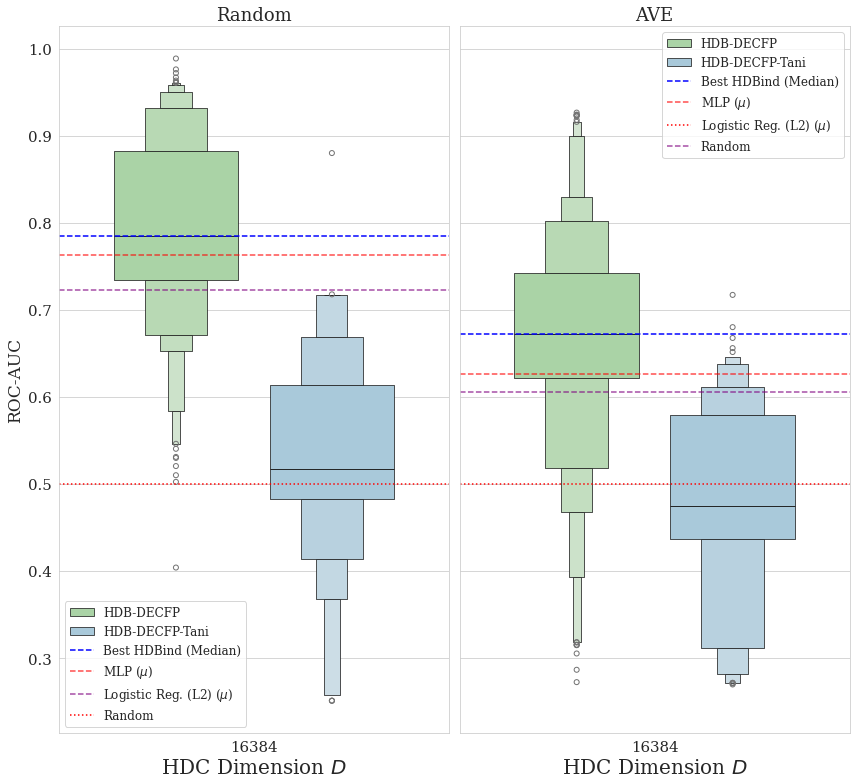

In [159]:
def lit_pcba_roc_auc_boxenplot_main(model_set_name:str, model_name_map:dict):
    assert model_set_name is not None

    # big plots
    # rand_f, rand_ax = plt.subplots(1,1, figsize=(16,18),sharex=True, sharey=True)
    # ave_f, ave_ax = plt.subplots(1,1, figsize=(16,18), sharex=True, sharey=True)
    f, ax = plt.subplots(1,2, figsize=(12,11),sharex=True, sharey=True)
    rand_f, rand_ax = f, ax[0]
    ave_f, ave_ax = f, ax[1] 

    ave_metric_df = load_lit_pcba_metric_df(model_set_name=model_set_name, model_name_map=model_name_map, split="ave")
    random_metric_df = load_lit_pcba_metric_df(model_set_name, model_name_map=model_name_map, split="random")

    # import pdb
    # pdb.set_trace() 
    make_lit_pcba_roc_auc_boxenplot(random_metric_df=random_metric_df, ave_metric_df=ave_metric_df,
                                            rand_f=rand_f, rand_ax=rand_ax, ave_f=ave_f, ave_ax=ave_ax)


    return ave_metric_df

# debug_ave_metric_df = lit_pcba_roc_auc_boxenplot_main(model_set_name="fig3-models-no-logreg", model_name_map=fig3_no_logreg_name_map)
# debug_ave_metric_df = lit_pcba_roc_auc_boxenplot_main(model_set_name="fig3-models", model_name_map=fig3_name_map)
debug_ave_metric_df = lit_pcba_roc_auc_boxenplot_main(model_set_name="16384-models", model_name_map=dim_16384_map)


In [151]:
dim_16384_map

{'logreg-1024-1': ('Log. Reg. (L2), r=1', 1024),
 'logreg-1024-2': ('Log. Reg. (L2), r=2', 1024),
 'logreg-1024-4': ('Log. Reg. (L2), r=4', 1024),
 'logreg-2048-1': ('Log. Reg. (L2), r=1', 2048),
 'logreg-2048-2': ('Log. Reg. (L2), r=2', 2048),
 'logreg-2048-4': ('Log. Reg. (L2), r=4', 2048),
 'mlp-1024-1': ('MLP-1024', 1024),
 'hdbind-directecfp-tanimoto-16384-1': ('HDB-DECFP-Tani', 16384),
 'hdbind-directecfp-16384-1': ('HDB-DECFP', 16384),
 'hdbind-directecfp-16384-2': ('HDB-DECFP', 16384),
 'hdbind-directecfp-16384-4': ('HDB-DECFP', 16384)}

In [152]:
print(debug_ave_metric_df.groupby(["model", "D"])['roc-auc'].mean().to_frame().to_string())

                            roc-auc
model               D              
HDB-DECFP           16384  0.669674
HDB-DECFP-Tani      16384  0.477822
Log. Reg. (L2), r=1 1024   0.641988
                    2048   0.636651
Log. Reg. (L2), r=2 1024   0.636713
                    2048   0.651174
Log. Reg. (L2), r=4 1024   0.611408
                    2048   0.605736
MLP-1024            1024   0.626769


In [14]:

def ttest_main(metric="roc-auc"):

    for alpha in [0.05, .025, .01]:
        for method in ["bonferroni", "holm", "simes-hochberg"]:
            make_ttest_plot(metric=metric, mult_alpha=alpha, method=method)

# ttest_main(metric="roc-auc")
# ttest_main(metric="er-1")


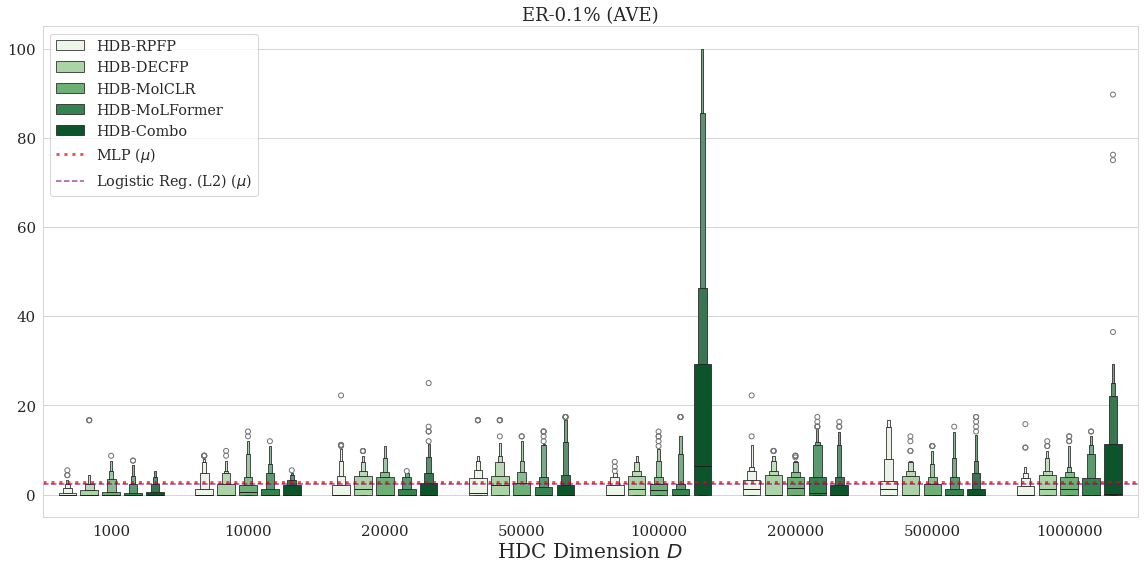

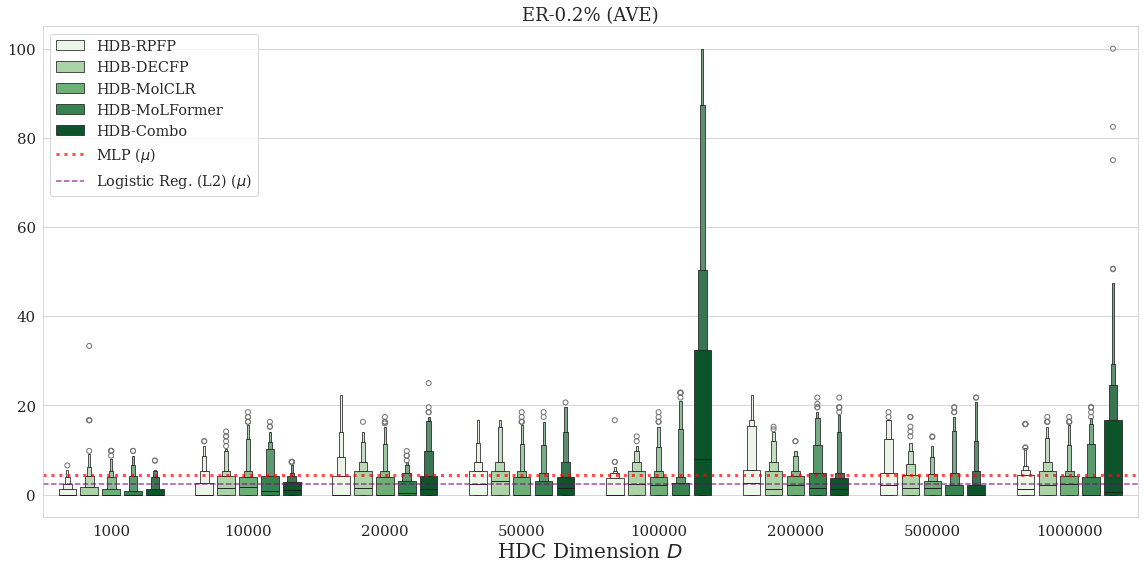

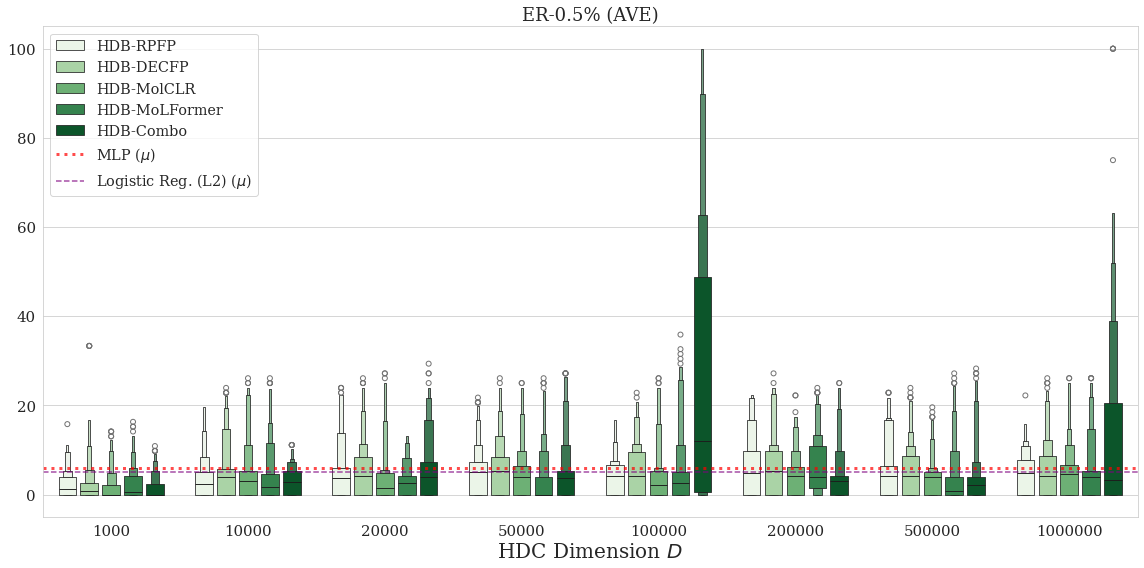

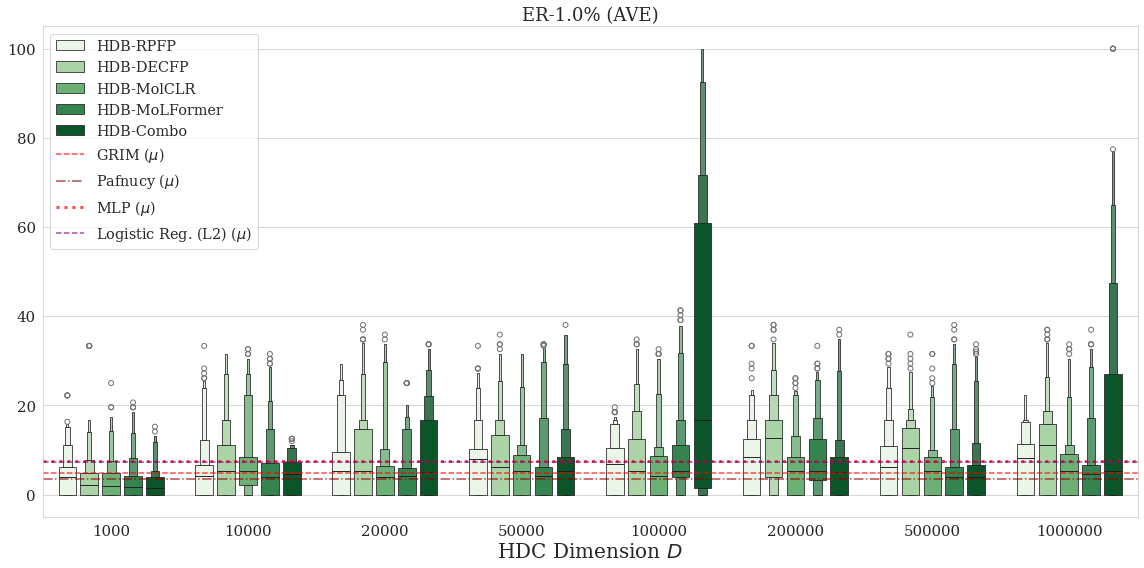

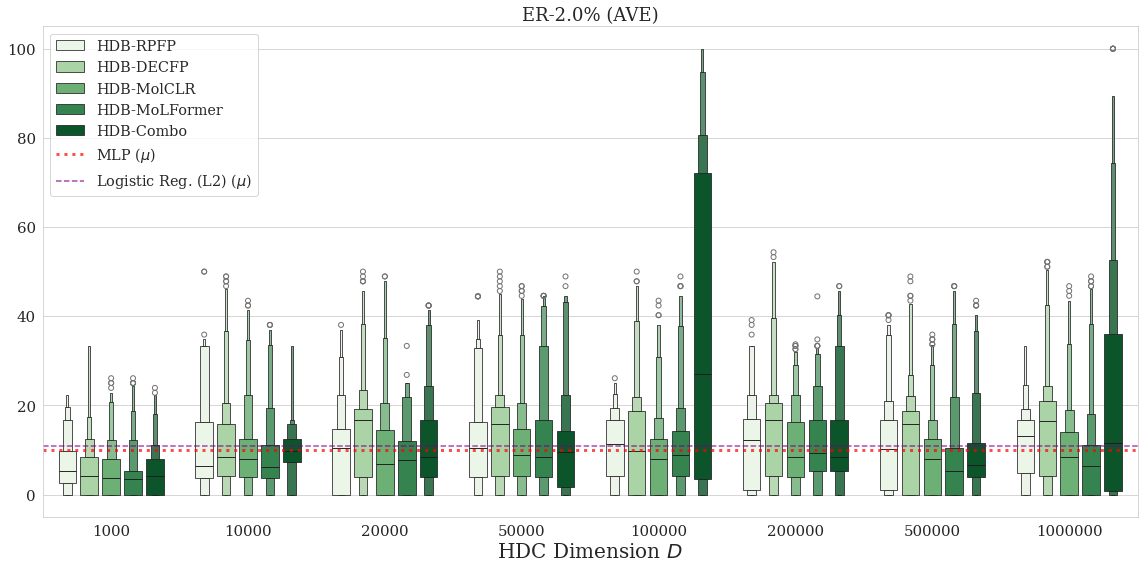

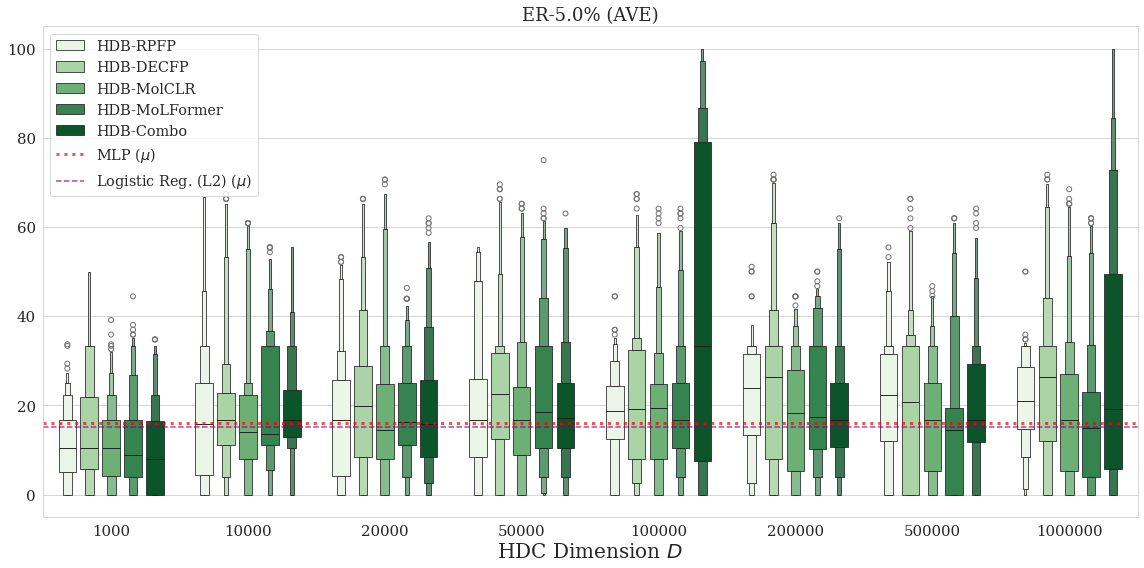

In [160]:
def lit_pcba_er_main(model_set_name, model_name_map):
    ave_metric_df = load_lit_pcba_metric_df(model_set_name=model_set_name, model_name_map=model_name_map, split="ave")
    for thresh in [1/1000, 2/1000, 5/1000, 1/100, 2/100, 5/100]:
        make_lit_pcba_er_plot(df=ave_metric_df, thresh=thresh)

lit_pcba_er_main(model_set_name="fig3-models", model_name_map=fig3_name_map)

In [ ]:
def write_lit_pcba_results():
    lit_pcba_summary_df = pd.read_csv("/g/g13/jones289/workspace/hd-cuda-master/notebooks/lit-pcba-dataset-overview.csv")
    merge_df = pd.merge(ave_metric_df, lit_pcba_summary_df, left_on="target", right_on="Set")


    # merge_df
    # paper_df = merge_df[merge_df["D"] > 10000].groupby(["model", 'D', 'target']).describe()[['roc-auc', 'er-1']].round(2)
    paper_df = merge_df[merge_df["D"] > 10000].groupby(["model", 'D', 'target']).describe().round(2)


    mask_cols = [x for x in paper_df.columns if x[1] in ["mean", "std", "min", "max"]]
    paper_df = paper_df.loc[:, mask_cols]
    mask_cols = [x for x in paper_df.columns if x[0] in ["roc-auc", "er-1", "Actives"]]
    paper_df = paper_df.loc[:, mask_cols]
    # print(paper_df.columns)
    mask_cols = [x for x in paper_df.columns if x[0] != "Actives" or x[0] == "Actives" and x[1] not in ["std", "min", "max"]]
    paper_df = paper_df.loc[:, mask_cols]
    # paper_df.to_csv("lit-pcba-by-target-metrics.csv")
    paper_df.to_latex("lit-pcba-by-target-metrics.tex")
    paper_df
write_lit_pcba_results()